In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
application_train = pd.read_csv('application_train.csv')

In [ ]:
data = application_train
data.head(10)

In [4]:
data.shape

(307511, 122)

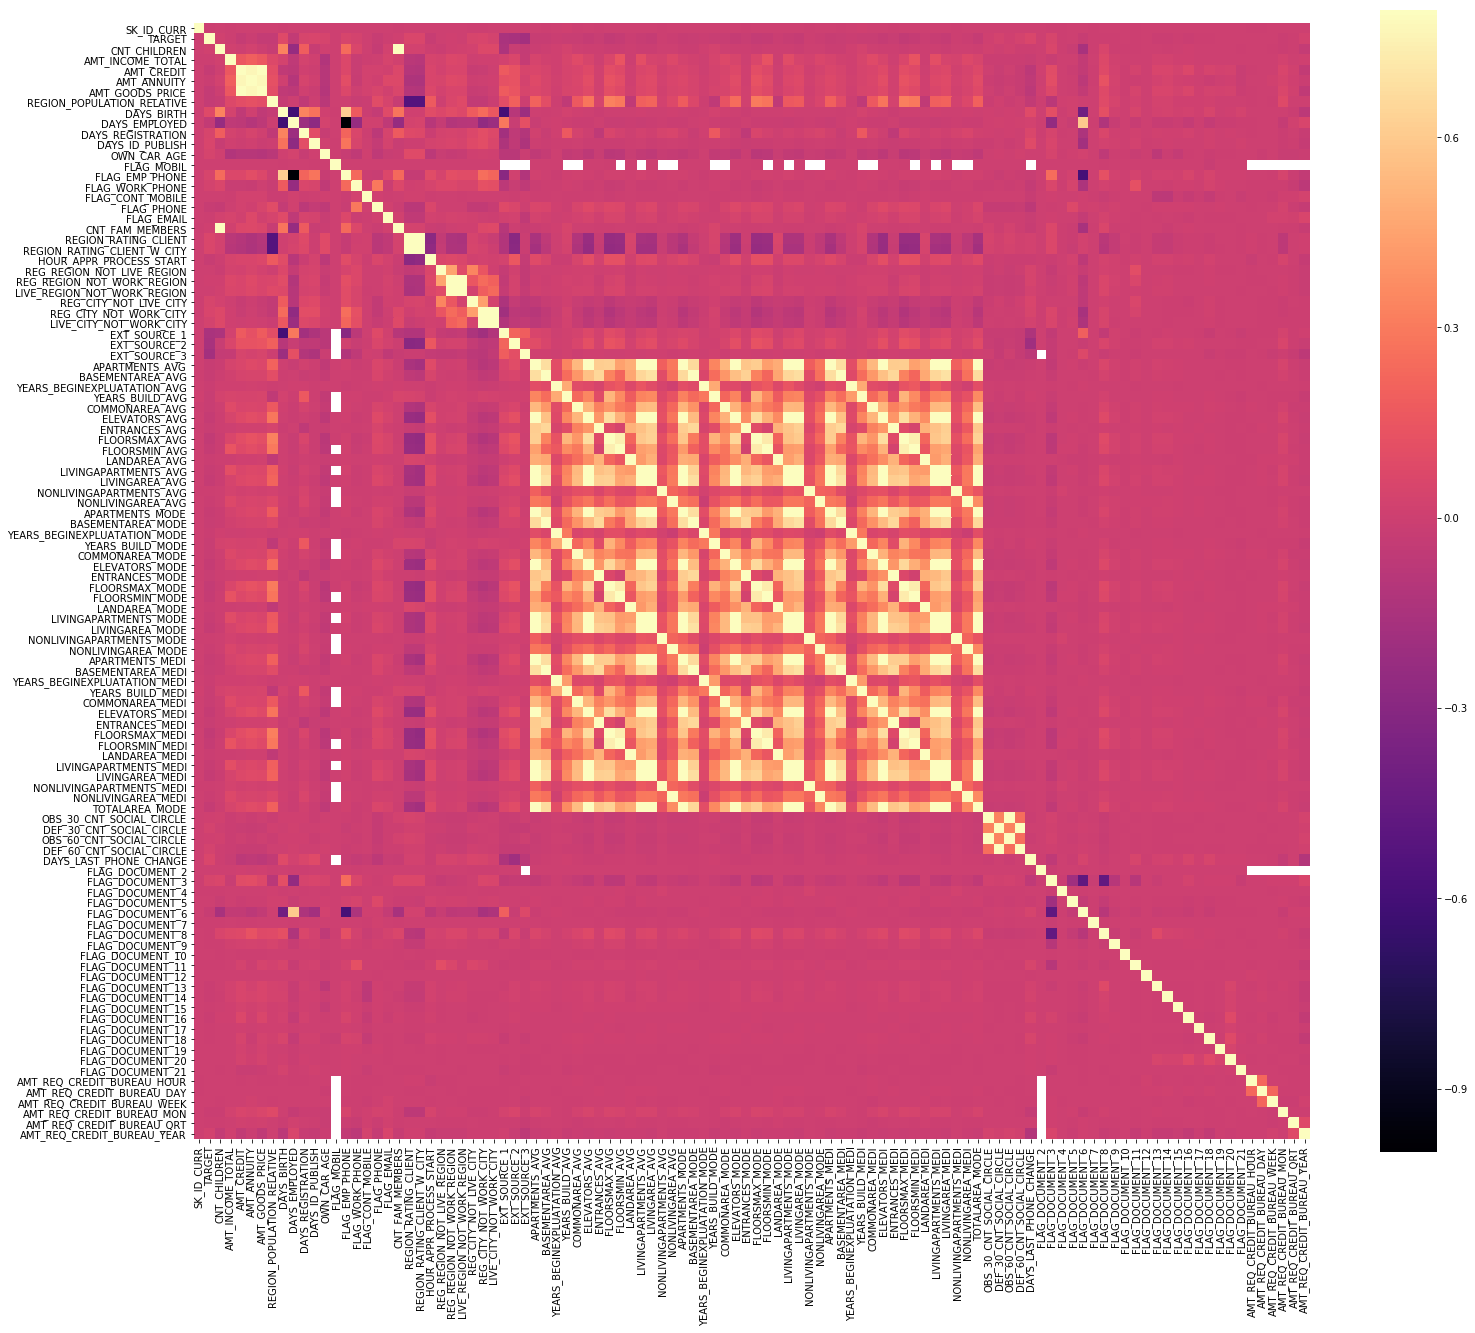

In [5]:
corr = data.corr()
plt.figure(figsize=(25, 21))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [6]:
fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
data = data.fillna(value=fill)

In [7]:
cat_clmns = data.columns[data.dtypes == 'object']
data[cat_clmns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel,No


In [8]:
data = data[~data['CODE_GENDER'].isin(['XNA'])]

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in data:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
        else:
            print(col, len(list(data[col].unique())))

NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 4
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7


In [10]:
cat_clmns = data.columns[data.dtypes == 'object']
data[cat_clmns].head()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
1,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
2,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel
3,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel
4,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel


In [11]:
def changeToRisk(string):
    works = data[['TARGET', string]]

    risks = works.groupby([string], as_index=False).mean()
    risksMap = {}

    for i in range(len(risks)):
        risksMap[risks.iloc[i][string]] = risks.iloc[i]['TARGET']

    stringRisk = string + '_RISK'
    data[stringRisk]  = data[string].map(risksMap)

    data.drop([string], 1, inplace = True)
    
stringsArray = ['NAME_TYPE_SUITE', 
                'NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE',
                'OCCUPATION_TYPE',
                'WEEKDAY_APPR_PROCESS_START',
                'ORGANIZATION_TYPE',
                
                'FONDKAPREMONT_MODE',
                'HOUSETYPE_MODE',
                'WALLSMATERIAL_MODE'
               ]

for string in stringsArray: 
    changeToRisk(string)
    string = string+'_RISK'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

NAME_TYPE_SUITE_RISK
[[1.         0.01019182]
 [0.01019182 1.        ]]
NAME_INCOME_TYPE_RISK
[[1.         0.06384746]
 [0.06384746 1.        ]]
NAME_EDUCATION_TYPE_RISK
[[1.         0.05757082]
 [0.05757082 1.        ]]
NAME_FAMILY_STATUS_RISK
[[1.         0.04051255]
 [0.04051255 1.        ]]
NAME_HOUSING_TYPE_RISK
[[1.         0.03698096]
 [0.03698096 1.        ]]
OCCUPATION_TYPE_RISK
[[1.         0.06230334]
 [0.06230334 1.        ]]
WEEKDAY_APPR_PROCESS_START_RISK
[[1.         0.00707613]
 [0.00707613 1.        ]]
ORGANIZATION_TYPE_RISK
[[1.         0.07234066]
 [0.07234066 1.        ]]
FONDKAPREMONT_MODE_RISK
[[1.         0.01647735]
 [0.01647735 1.        ]]
HOUSETYPE_MODE_RISK
[[1.         0.00540515]
 [0.00540515 1.        ]]
WALLSMATERIAL_MODE_RISK
[[1.         0.01936871]
 [0.01936871 1.        ]]


In [12]:
data['AMT_REQ_CREDIT_BUREAU_DAY']+=data['AMT_REQ_CREDIT_BUREAU_HOUR']
data['AMT_REQ_CREDIT_BUREAU_WEEK']+=data['AMT_REQ_CREDIT_BUREAU_DAY']
data['AMT_REQ_CREDIT_BUREAU_MON']+=data['AMT_REQ_CREDIT_BUREAU_WEEK']
data['AMT_REQ_CREDIT_BUREAU_QRT']+=data['AMT_REQ_CREDIT_BUREAU_MON']
data['AMT_REQ_CREDIT_BUREAU_YEAR']+=data['AMT_REQ_CREDIT_BUREAU_QRT']

In [13]:
bureau = pd.read_csv('bureau.csv')
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [14]:
fill = bureau.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
bureau = bureau.fillna(value=fill)

In [15]:
#Count of client's previous loans in HCB
temp = bureau[['SK_ID_CURR', 'SK_ID_BUREAU']]
count = temp.groupby(['SK_ID_CURR'], as_index = False).count()
count.rename(columns = {'SK_ID_BUREAU': 'COUNT_BUREAU_HCB'}, inplace = True)
data = pd.merge(data, count, how = 'left', on = 'SK_ID_CURR')

In [16]:
def changeToMax(string):
    temp = bureau[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).max()
    
    simple.rename(columns={string: 'bureau_'+string+'_MAX'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result 

def changeToMin(string):
    temp = bureau[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).min()
    
    simple.rename(columns={string: 'bureau_'+string+'_MIN'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

def changeToMean(string):
    temp = bureau[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).mean()
    
    simple.rename(columns={string: 'bureau_'+string+'_MEAN'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

def changeToMed(string):
    temp = bureau[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).median()
    
    simple.rename(columns={string: 'bureau_'+string+'_MED'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

stringsArray = []

for col in bureau:
    if (bureau[col].dtype != 'object' and col != 'SK_ID_BUREAU' and col != 'SK_ID_CURR'):
        stringsArray.append(col)

print(stringsArray)

for string in stringsArray:
    data = changeToMax(string)
    data = changeToMin(string)
    data = changeToMean(string)
    data = changeToMed(string)
    
data = data.fillna(value=0)

for string in stringsArray: 
    string = 'bureau_'+string+'_MAX'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))
    
for string in stringsArray:
    string = 'bureau_'+string + '_MIN'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))
    
    
for string in stringsArray:
    string = 'bureau_'+string + '_MEAN'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))
    
for string in stringsArray:
    string = 'bureau_'+string + '_MED'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']
bureau_DAYS_CREDIT_MAX
[[1.         0.05274179]
 [0.05274179 1.        ]]
bureau_CREDIT_DAY_OVERDUE_MAX
[[1.         0.00435986]
 [0.00435986 1.        ]]
bureau_DAYS_CREDIT_ENDDATE_MAX
[[1.         0.02659211]
 [0.02659211 1.        ]]
bureau_DAYS_ENDDATE_FACT_MAX
[[1.         0.02772205]
 [0.02772205 1.        ]]
bureau_AMT_CREDIT_MAX_OVERDUE_MAX
[[1.         0.00177176]
 [0.00177176 1.        ]]
bureau_CNT_CREDIT_PROLONG_MAX
[[1.         0.00164981]
 [0.00164981 1.        ]]
bureau_AMT_CREDIT_SUM_MAX
[[ 1.         -0.02300037]
 [-0.02300037  1.        ]]
bureau_AMT_CREDIT_SUM_DEBT_MAX
[[ 1.         -0.00595243]
 [-0.00595243  1.        ]]
bureau_AMT_CREDIT_SUM_LIMIT_MAX
[[ 1.         -0.01232782]
 [-0.01232782  1.        ]]
burea

In [17]:
def changeToSumValues(string, status):
    temp = bureau[['SK_ID_CURR', string]]

    ser = temp[string]
    temp[string] = ser.where(ser == status)
    temp = temp[temp[string].isin([status])] 
    temp[string] = 1
    
    simple = temp.groupby(['SK_ID_CURR'], as_index=False).sum()
    simple.rename(columns={string: 'bureau_'+string+"_"+status}, inplace=True)
        
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result 

stringsArray = []

for string in bureau['CREDIT_ACTIVE'].drop_duplicates():
    data = changeToSumValues('CREDIT_ACTIVE', string)
    stringsArray.append('bureau_'+'CREDIT_ACTIVE_'+string)
    
for string in bureau['CREDIT_TYPE'].drop_duplicates():
    data = changeToSumValues('CREDIT_TYPE', string)
    stringsArray.append('bureau_'+'CREDIT_TYPE_'+string)
    
data = data.fillna(value=0)

for string in stringsArray:
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

bureau_CREDIT_ACTIVE_Closed
[[ 1.         -0.03723083]
 [-0.03723083  1.        ]]
bureau_CREDIT_ACTIVE_Active
[[1.         0.04357282]
 [0.04357282 1.        ]]
bureau_CREDIT_ACTIVE_Sold
[[1.        0.0093542]
 [0.0093542 1.       ]]
bureau_CREDIT_ACTIVE_Bad debt
[[1.         0.00353097]
 [0.00353097 1.        ]]
bureau_CREDIT_TYPE_Consumer credit
[[ 1.         -0.02127266]
 [-0.02127266  1.        ]]
bureau_CREDIT_TYPE_Credit card
[[1.         0.02041185]
 [0.02041185 1.        ]]
bureau_CREDIT_TYPE_Mortgage
[[ 1.         -0.02371703]
 [-0.02371703  1.        ]]
bureau_CREDIT_TYPE_Car loan
[[ 1.         -0.02179083]
 [-0.02179083  1.        ]]
bureau_CREDIT_TYPE_Microloan
[[1.         0.03012194]
 [0.03012194 1.        ]]
bureau_CREDIT_TYPE_Loan for working capital replenishment
[[1.        0.0050865]
 [0.0050865 1.       ]]
bureau_CREDIT_TYPE_Loan for business development
[[ 1.         -0.00418092]
 [-0.00418092  1.        ]]
bureau_CREDIT_TYPE_Real estate loan
[[ 1.       -0.002563

In [18]:
prev_appl = pd.read_csv('previous_application.csv')
prev_appl.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
prev_appl.shape

(1670214, 37)

In [20]:
fill = prev_appl.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
prev_appl = prev_appl.fillna(value=fill)

In [21]:
#Count of client's previous loans in HCB
temp = prev_appl[['SK_ID_CURR', 'SK_ID_PREV']]
count = temp.groupby(['SK_ID_CURR'], as_index = False).count()
count.rename(columns = {'SK_ID_PREV': 'COUNT_PREV_HCB'}, inplace = True)
data = pd.merge(data, count, how = 'left', on = 'SK_ID_CURR')

In [22]:
for col in prev_appl:
    if prev_appl[col].dtype == 'object':
        print(col, len(list(prev_appl[col].unique())))

NAME_CONTRACT_TYPE 4
WEEKDAY_APPR_PROCESS_START 7
FLAG_LAST_APPL_PER_CONTRACT 2
NAME_CASH_LOAN_PURPOSE 25
NAME_CONTRACT_STATUS 4
NAME_PAYMENT_TYPE 4
CODE_REJECT_REASON 9
NAME_TYPE_SUITE 7
NAME_CLIENT_TYPE 4
NAME_GOODS_CATEGORY 28
NAME_PORTFOLIO 5
NAME_PRODUCT_TYPE 3
CHANNEL_TYPE 8
NAME_SELLER_INDUSTRY 11
NAME_YIELD_GROUP 5
PRODUCT_COMBINATION 17


In [23]:
def changeToSumValues(string, status):
    temp = prev_appl[['SK_ID_CURR', string]]

    ser = temp[string]
    temp[string] = ser.where(ser == status)
    temp = temp[temp[string].isin([status])] 
    temp[string] = 1
    
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).sum()
    simple.rename(columns={string: 'prev_'+string+"_"+status}, inplace = True)
        
    result = pd.merge(data, simple, how = 'left', on = 'SK_ID_CURR')
    return result


def corrWithTarget(stringsArray):
    for string in stringsArray:
        print(string)
        print(np.corrcoef(data['TARGET'].values, data[string]))

In [24]:
stringsArray_1 = []

for string in prev_appl['NAME_CONTRACT_TYPE'].drop_duplicates():
    data = changeToSumValues('NAME_CONTRACT_TYPE', string)
    stringsArray_1.append('prev_NAME_CONTRACT_TYPE_'+string)

data = data.fillna(value=0)

In [25]:
corrWithTarget(stringsArray_1)

prev_NAME_CONTRACT_TYPE_Consumer loans
[[ 1.         -0.01481315]
 [-0.01481315  1.        ]]
prev_NAME_CONTRACT_TYPE_Cash loans
[[1.         0.02477032]
 [0.02477032 1.        ]]
prev_NAME_CONTRACT_TYPE_Revolving loans
[[1.         0.04665537]
 [0.04665537 1.        ]]
prev_NAME_CONTRACT_TYPE_XNA
[[1.         0.01286919]
 [0.01286919 1.        ]]


In [26]:
stringsArray_2 = []

for string in prev_appl['WEEKDAY_APPR_PROCESS_START'].drop_duplicates():
    data = changeToSumValues('WEEKDAY_APPR_PROCESS_START', string)
    stringsArray_2.append('prev_WEEKDAY_APPR_PROCESS_START_'+string)

data = data.fillna(value=0)

In [27]:
corrWithTarget(stringsArray_2)

prev_WEEKDAY_APPR_PROCESS_START_SATURDAY
[[1.         0.00587711]
 [0.00587711 1.        ]]
prev_WEEKDAY_APPR_PROCESS_START_THURSDAY
[[1.         0.01718458]
 [0.01718458 1.        ]]
prev_WEEKDAY_APPR_PROCESS_START_TUESDAY
[[1.         0.01473195]
 [0.01473195 1.        ]]
prev_WEEKDAY_APPR_PROCESS_START_MONDAY
[[1.        0.0163927]
 [0.0163927 1.       ]]
prev_WEEKDAY_APPR_PROCESS_START_FRIDAY
[[1.         0.01442118]
 [0.01442118 1.        ]]
prev_WEEKDAY_APPR_PROCESS_START_SUNDAY
[[ 1.00000000e+00 -3.21700546e-04]
 [-3.21700546e-04  1.00000000e+00]]
prev_WEEKDAY_APPR_PROCESS_START_WEDNESDAY
[[1.         0.01324033]
 [0.01324033 1.        ]]


In [28]:
stringsArray_3 = []

for string in prev_appl['NAME_CASH_LOAN_PURPOSE'].drop_duplicates():
    data = changeToSumValues('NAME_CASH_LOAN_PURPOSE', string)
    stringsArray_3.append('prev_NAME_CASH_LOAN_PURPOSE_'+string)

data = data.fillna(value=0)

In [29]:
corrWithTarget(stringsArray_3)

prev_NAME_CASH_LOAN_PURPOSE_XAP
[[1.         0.00902487]
 [0.00902487 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_XNA
[[1.         0.01491277]
 [0.01491277 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Repairs
[[1.         0.03158125]
 [0.03158125 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Everyday expenses
[[1.         0.00633373]
 [0.00633373 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Car repairs
[[1.         0.01477928]
 [0.01477928 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Building a house or an annex
[[1.         0.01248471]
 [0.01248471 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Other
[[1.         0.02404856]
 [0.02404856 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Journey
[[1.         0.00434964]
 [0.00434964 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment
[[1.         0.00767525]
 [0.00767525 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Medicine
[[1.         0.01160342]
 [0.01160342 1.        ]]
prev_NAME_CASH_LOAN_PURPOSE_Payments on other loans
[[1.         0.01595262]
 [

In [30]:
stringsArray_4 = []

for string in prev_appl['NAME_CONTRACT_STATUS'].drop_duplicates():
    data = changeToSumValues('NAME_CONTRACT_STATUS', string)
    stringsArray_4.append('prev_NAME_CONTRACT_STATUS_'+string)

data = data.fillna(value=0)

In [31]:
corrWithTarget(stringsArray_4)

prev_NAME_CONTRACT_STATUS_Approved
[[ 1.       -0.023517]
 [-0.023517  1.      ]]
prev_NAME_CONTRACT_STATUS_Refused
[[1.         0.06477364]
 [0.06477364 1.        ]]
prev_NAME_CONTRACT_STATUS_Canceled
[[1.         0.02075914]
 [0.02075914 1.        ]]
prev_NAME_CONTRACT_STATUS_Unused offer
[[1.         0.00152718]
 [0.00152718 1.        ]]


In [32]:
stringsArray_5 = []

for string in prev_appl['NAME_PAYMENT_TYPE'].drop_duplicates():
    data = changeToSumValues('NAME_PAYMENT_TYPE', string)
    stringsArray_5.append('prev_NAME_PAYMENT_TYPE_'+string)

data = data.fillna(value=0)

In [33]:
corrWithTarget(stringsArray_5)

prev_NAME_PAYMENT_TYPE_Cash through the bank
[[1.00000000e+00 5.42893925e-04]
 [5.42893925e-04 1.00000000e+00]]
prev_NAME_PAYMENT_TYPE_XNA
[[1.         0.04127207]
 [0.04127207 1.        ]]
prev_NAME_PAYMENT_TYPE_Non-cash from your account
[[1.00000000e+00 6.00532822e-04]
 [6.00532822e-04 1.00000000e+00]]
prev_NAME_PAYMENT_TYPE_Cashless from the account of the employer
[[1.0000000e+00 5.6882014e-06]
 [5.6882014e-06 1.0000000e+00]]


In [34]:
stringsArray_6 = []

for string in prev_appl['CODE_REJECT_REASON'].drop_duplicates():
    data = changeToSumValues('CODE_REJECT_REASON', string)
    stringsArray_6.append('prev_CODE_REJECT_REASON_'+string)

data = data.fillna(value=0)

In [35]:
corrWithTarget(stringsArray_6)

prev_CODE_REJECT_REASON_XAP
[[ 1.        -0.0055273]
 [-0.0055273  1.       ]]
prev_CODE_REJECT_REASON_HC
[[1.         0.04750405]
 [0.04750405 1.        ]]
prev_CODE_REJECT_REASON_LIMIT
[[1.         0.04068908]
 [0.04068908 1.        ]]
prev_CODE_REJECT_REASON_CLIENT
[[1.         0.00152718]
 [0.00152718 1.        ]]
prev_CODE_REJECT_REASON_SCOFR
[[1.         0.05562566]
 [0.05562566 1.        ]]
prev_CODE_REJECT_REASON_SCO
[[1.         0.01530794]
 [0.01530794 1.        ]]
prev_CODE_REJECT_REASON_XNA
[[1.         0.00723249]
 [0.00723249 1.        ]]
prev_CODE_REJECT_REASON_VERIF
[[1.         0.00337041]
 [0.00337041 1.        ]]
prev_CODE_REJECT_REASON_SYSTEM
[[ 1.         -0.00220993]
 [-0.00220993  1.        ]]


In [36]:
stringsArray_7 = []

for string in prev_appl['NAME_TYPE_SUITE'].drop_duplicates():
    data = changeToSumValues('NAME_TYPE_SUITE', string)
    stringsArray_7.append('prev_NAME_TYPE_SUITE_'+string)

data = data.fillna(value=0)

In [37]:
corrWithTarget(stringsArray_7)

prev_NAME_TYPE_SUITE_Unaccompanied
[[1.         0.03054419]
 [0.03054419 1.        ]]
prev_NAME_TYPE_SUITE_Spouse, partner
[[1.        0.0019038]
 [0.0019038 1.       ]]
prev_NAME_TYPE_SUITE_Family
[[ 1.         -0.01280838]
 [-0.01280838  1.        ]]
prev_NAME_TYPE_SUITE_Children
[[ 1.         -0.01555503]
 [-0.01555503  1.        ]]
prev_NAME_TYPE_SUITE_Other_B
[[1.         0.00295956]
 [0.00295956 1.        ]]
prev_NAME_TYPE_SUITE_Other_A
[[1.         0.00323037]
 [0.00323037 1.        ]]
prev_NAME_TYPE_SUITE_Group of people
[[1.         0.00212426]
 [0.00212426 1.        ]]


In [38]:
stringsArray_8 = []

for string in prev_appl['NAME_CLIENT_TYPE'].drop_duplicates():
    data = changeToSumValues('NAME_CLIENT_TYPE', string)
    stringsArray_8.append('prev_NAME_CLIENT_TYPE_'+string)

data = data.fillna(value=0)

In [39]:
corrWithTarget(stringsArray_8)

prev_NAME_CLIENT_TYPE_Repeater
[[1.         0.01922916]
 [0.01922916 1.        ]]
prev_NAME_CLIENT_TYPE_New
[[1.         0.04870712]
 [0.04870712 1.        ]]
prev_NAME_CLIENT_TYPE_Refreshed
[[ 1.         -0.01184705]
 [-0.01184705  1.        ]]
prev_NAME_CLIENT_TYPE_XNA
[[1.         0.00334341]
 [0.00334341 1.        ]]


In [40]:
stringsArray_9 = []

for string in prev_appl['NAME_GOODS_CATEGORY'].drop_duplicates():
    data = changeToSumValues('NAME_GOODS_CATEGORY', string)
    stringsArray_9.append('prev_NAME_GOODS_CATEGORY_'+string)

data = data.fillna(value=0)

In [41]:
corrWithTarget(stringsArray_9)

prev_NAME_GOODS_CATEGORY_Mobile
[[1.         0.01337986]
 [0.01337986 1.        ]]
prev_NAME_GOODS_CATEGORY_XNA
[[1.         0.03471505]
 [0.03471505 1.        ]]
prev_NAME_GOODS_CATEGORY_Consumer Electronics
[[ 1.         -0.01853396]
 [-0.01853396  1.        ]]
prev_NAME_GOODS_CATEGORY_Construction Materials
[[ 1.         -0.00884085]
 [-0.00884085  1.        ]]
prev_NAME_GOODS_CATEGORY_Auto Accessories
[[1.         0.00446703]
 [0.00446703 1.        ]]
prev_NAME_GOODS_CATEGORY_Photo / Cinema Equipment
[[ 1.         -0.00389344]
 [-0.00389344  1.        ]]
prev_NAME_GOODS_CATEGORY_Computers
[[1.00000000e+00 5.38462887e-04]
 [5.38462887e-04 1.00000000e+00]]
prev_NAME_GOODS_CATEGORY_Audio/Video
[[ 1.         -0.00695573]
 [-0.00695573  1.        ]]
prev_NAME_GOODS_CATEGORY_Medicine
[[ 1.         -0.00419706]
 [-0.00419706  1.        ]]
prev_NAME_GOODS_CATEGORY_Clothing and Accessories
[[ 1.         -0.01869676]
 [-0.01869676  1.        ]]
prev_NAME_GOODS_CATEGORY_Furniture
[[ 1.       

In [42]:
stringsArray_10 = []

for string in prev_appl['NAME_PORTFOLIO'].drop_duplicates():
    data = changeToSumValues('NAME_PORTFOLIO', string)
    stringsArray_10.append('prev_NAME_PORTFOLIO_'+string)

data = data.fillna(value=0)

In [43]:
corrWithTarget(stringsArray_10)

prev_NAME_PORTFOLIO_POS
[[ 1.         -0.01814283]
 [-0.01814283  1.        ]]
prev_NAME_PORTFOLIO_Cash
[[1.         0.01780393]
 [0.01780393 1.        ]]
prev_NAME_PORTFOLIO_XNA
[[1.         0.03375433]
 [0.03375433 1.        ]]
prev_NAME_PORTFOLIO_Cards
[[1.         0.04274353]
 [0.04274353 1.        ]]
prev_NAME_PORTFOLIO_Cars
[[ 1.         -0.00264738]
 [-0.00264738  1.        ]]


In [44]:
stringsArray_11 = []

for string in prev_appl['NAME_PRODUCT_TYPE'].drop_duplicates():
    data = changeToSumValues('NAME_PRODUCT_TYPE', string)
    stringsArray_11.append('prev_NAME_PRODUCT_TYPE_'+string)

data = data.fillna(value=0)

In [45]:
corrWithTarget(stringsArray_11)

prev_NAME_PRODUCT_TYPE_XNA
[[1.         0.01154974]
 [0.01154974 1.        ]]
prev_NAME_PRODUCT_TYPE_x-sell
[[1.00000000e+00 3.60847485e-04]
 [3.60847485e-04 1.00000000e+00]]
prev_NAME_PRODUCT_TYPE_walk-in
[[1.         0.06278934]
 [0.06278934 1.        ]]


In [46]:
stringsArray_12 = []

for string in prev_appl['CHANNEL_TYPE'].drop_duplicates():
    data = changeToSumValues('CHANNEL_TYPE', string)
    stringsArray_12.append('prev_CHANNEL_TYPE_'+string)

data = data.fillna(value=0)

In [47]:
corrWithTarget(stringsArray_12)

prev_CHANNEL_TYPE_Country-wide
[[1.         0.00557149]
 [0.00557149 1.        ]]
prev_CHANNEL_TYPE_Contact center
[[1.         0.02445232]
 [0.02445232 1.        ]]
prev_CHANNEL_TYPE_Credit and cash offices
[[1.         0.02098313]
 [0.02098313 1.        ]]
prev_CHANNEL_TYPE_Stone
[[ 1.         -0.01523981]
 [-0.01523981  1.        ]]
prev_CHANNEL_TYPE_Regional / Local
[[ 1.         -0.00720384]
 [-0.00720384  1.        ]]
prev_CHANNEL_TYPE_AP+ (Cash loan)
[[1.         0.03486225]
 [0.03486225 1.        ]]
prev_CHANNEL_TYPE_Channel of corporate sales
[[ 1.         -0.00373451]
 [-0.00373451  1.        ]]
prev_CHANNEL_TYPE_Car dealer
[[ 1.         -0.00312706]
 [-0.00312706  1.        ]]


In [48]:
stringsArray_13 = []

for string in prev_appl['NAME_SELLER_INDUSTRY'].drop_duplicates():
    data = changeToSumValues('NAME_SELLER_INDUSTRY', string)
    stringsArray_13.append('prev_NAME_SELLER_INDUSTRY_'+string)

data = data.fillna(value=0)

In [49]:
corrWithTarget(stringsArray_13)

prev_NAME_SELLER_INDUSTRY_Connectivity
[[1.         0.02645551]
 [0.02645551 1.        ]]
prev_NAME_SELLER_INDUSTRY_XNA
[[1.         0.03165187]
 [0.03165187 1.        ]]
prev_NAME_SELLER_INDUSTRY_Consumer electronics
[[ 1.         -0.01470659]
 [-0.01470659  1.        ]]
prev_NAME_SELLER_INDUSTRY_Industry
[[ 1.         -0.00629037]
 [-0.00629037  1.        ]]
prev_NAME_SELLER_INDUSTRY_Clothing
[[ 1.         -0.01839242]
 [-0.01839242  1.        ]]
prev_NAME_SELLER_INDUSTRY_Furniture
[[ 1.         -0.02365014]
 [-0.02365014  1.        ]]
prev_NAME_SELLER_INDUSTRY_Construction
[[ 1.         -0.01282771]
 [-0.01282771  1.        ]]
prev_NAME_SELLER_INDUSTRY_Jewelry
[[1.         0.00216266]
 [0.00216266 1.        ]]
prev_NAME_SELLER_INDUSTRY_Auto technology
[[1.         0.00836738]
 [0.00836738 1.        ]]
prev_NAME_SELLER_INDUSTRY_MLM partners
[[ 1.         -0.00257346]
 [-0.00257346  1.        ]]
prev_NAME_SELLER_INDUSTRY_Tourism
[[ 1.         -0.00405984]
 [-0.00405984  1.        ]]


In [50]:
stringsArray_14 = []

for string in prev_appl['NAME_YIELD_GROUP'].drop_duplicates():
    data = changeToSumValues('NAME_YIELD_GROUP', string)
    stringsArray_14.append('prev_NAME_YIELD_GROUP_'+string)

data = data.fillna(value=0)

In [51]:
corrWithTarget(stringsArray_14)

prev_NAME_YIELD_GROUP_middle
[[ 1.000000e+00 -8.377651e-04]
 [-8.377651e-04  1.000000e+00]]
prev_NAME_YIELD_GROUP_low_action
[[ 1.         -0.02273244]
 [-0.02273244  1.        ]]
prev_NAME_YIELD_GROUP_high
[[1.        0.0388039]
 [0.0388039 1.       ]]
prev_NAME_YIELD_GROUP_low_normal
[[ 1.         -0.02400668]
 [-0.02400668  1.        ]]
prev_NAME_YIELD_GROUP_XNA
[[1.         0.04325269]
 [0.04325269 1.        ]]


In [52]:
stringsArray_15 = []

for string in prev_appl['PRODUCT_COMBINATION'].drop_duplicates():
    data = changeToSumValues('PRODUCT_COMBINATION', string)
    stringsArray_15.append('prev_PRODUCT_COMBINATION_'+string)

data = data.fillna(value=0)

In [53]:
corrWithTarget(stringsArray_15)

prev_PRODUCT_COMBINATION_POS mobile with interest
[[1.         0.01649555]
 [0.01649555 1.        ]]
prev_PRODUCT_COMBINATION_Cash X-Sell: low
[[ 1.         -0.02111776]
 [-0.02111776  1.        ]]
prev_PRODUCT_COMBINATION_Cash X-Sell: high
[[1.         0.03675759]
 [0.03675759 1.        ]]
prev_PRODUCT_COMBINATION_Cash X-Sell: middle
[[ 1.         -0.00366469]
 [-0.00366469  1.        ]]
prev_PRODUCT_COMBINATION_Cash Street: high
[[1.         0.03221945]
 [0.03221945 1.        ]]
prev_PRODUCT_COMBINATION_Cash
[[1.         0.02608956]
 [0.02608956 1.        ]]
prev_PRODUCT_COMBINATION_POS household without interest
[[ 1.         -0.02093109]
 [-0.02093109  1.        ]]
prev_PRODUCT_COMBINATION_POS household with interest
[[ 1.         -0.00847053]
 [-0.00847053  1.        ]]
prev_PRODUCT_COMBINATION_POS other with interest
[[1.00000000e+00 4.82009537e-04]
 [4.82009537e-04 1.00000000e+00]]
prev_PRODUCT_COMBINATION_Card X-Sell
[[1.         0.01924113]
 [0.01924113 1.        ]]
prev_PRODU

In [54]:
stringsArray_16 = []

for string in prev_appl['FLAG_LAST_APPL_PER_CONTRACT'].drop_duplicates():
    data = changeToSumValues('FLAG_LAST_APPL_PER_CONTRACT', string)
    stringsArray_16.append('prev_FLAG_LAST_APPL_PER_CONTRACT_'+string)

data = data.fillna(value=0)

In [55]:
corrWithTarget(stringsArray_16)

prev_FLAG_LAST_APPL_PER_CONTRACT_Y
[[1.         0.02312488]
 [0.02312488 1.        ]]
prev_FLAG_LAST_APPL_PER_CONTRACT_N
[[1.         0.01048099]
 [0.01048099 1.        ]]


In [56]:
def changeToMax(string):
    temp = prev_appl[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).max()
    
    simple.rename(columns={string: 'prev_'+string+'_MAX'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

def changeToMin(string):
    temp = prev_appl[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).min()
    
    simple.rename(columns={string: 'prev_'+string+'_MIN'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

def changeToMean(string):
    temp = prev_appl[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).mean()
    
    simple.rename(columns={string: 'prev_'+string+'_MEAN'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

def changeToMed(string):
    temp = prev_appl[['SK_ID_CURR', string]]
    simple = temp.groupby(['SK_ID_CURR'], as_index = False).median()
    
    simple.rename(columns={string: 'prev_'+string+'_MED'}, inplace=True)
    result = pd.merge(data, simple, how = 'left', on='SK_ID_CURR')
    return result

In [57]:
stringsArray = []

for col in prev_appl:
    if (prev_appl[col].dtype != 'object' and col != 'SK_ID_PREV' and col != 'SK_ID_CURR'):
        stringsArray.append(col)

print(stringsArray)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [58]:
for string in stringsArray:
    data = changeToMax(string)
    data = changeToMin(string)
    data = changeToMean(string)
    data = changeToMed(string)
    
data = data.fillna(value=0)

In [59]:
for string in stringsArray:
    string = 'prev_'+string + '_MAX'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

prev_AMT_ANNUITY_MAX
[[ 1.         -0.02199616]
 [-0.02199616  1.        ]]
prev_AMT_APPLICATION_MAX
[[ 1.         -0.00837393]
 [-0.00837393  1.        ]]
prev_AMT_CREDIT_MAX
[[ 1.         -0.00430297]
 [-0.00430297  1.        ]]
prev_AMT_DOWN_PAYMENT_MAX
[[ 1.         -0.02398934]
 [-0.02398934  1.        ]]
prev_AMT_GOODS_PRICE_MAX
[[ 1.         -0.00836514]
 [-0.00836514  1.        ]]
prev_HOUR_APPR_PROCESS_START_MAX
[[ 1.         -0.00707571]
 [-0.00707571  1.        ]]
prev_NFLAG_LAST_APPL_IN_DAY_MAX
[[1.         0.01842243]
 [0.01842243 1.        ]]
prev_RATE_DOWN_PAYMENT_MAX
[[ 1.         -0.03681021]
 [-0.03681021  1.        ]]
prev_RATE_INTEREST_PRIMARY_MAX
[[1.         0.01772316]
 [0.01772316 1.        ]]
prev_RATE_INTEREST_PRIVILEGED_MAX
[[1.        0.0185348]
 [0.0185348 1.       ]]
prev_DAYS_DECISION_MAX
[[1.         0.01200755]
 [0.01200755 1.        ]]
prev_SELLERPLACE_AREA_MAX
[[ 1.        -0.0028241]
 [-0.0028241  1.       ]]
prev_CNT_PAYMENT_MAX
[[1.         0.03393

In [60]:
for string in stringsArray:
    string = 'prev_'+string + '_MIN'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

prev_AMT_ANNUITY_MIN
[[ 1.         -0.02445153]
 [-0.02445153  1.        ]]
prev_AMT_APPLICATION_MIN
[[ 1.         -0.01826544]
 [-0.01826544  1.        ]]
prev_AMT_CREDIT_MIN
[[ 1.         -0.01675815]
 [-0.01675815  1.        ]]
prev_AMT_DOWN_PAYMENT_MIN
[[ 1.         -0.01374418]
 [-0.01374418  1.        ]]
prev_AMT_GOODS_PRICE_MIN
[[ 1.         -0.01641602]
 [-0.01641602  1.        ]]
prev_HOUR_APPR_PROCESS_START_MIN
[[ 1.         -0.01244737]
 [-0.01244737  1.        ]]
prev_NFLAG_LAST_APPL_IN_DAY_MIN
[[1.         0.01428741]
 [0.01428741 1.        ]]
prev_RATE_DOWN_PAYMENT_MIN
[[ 1.         -0.01052135]
 [-0.01052135  1.        ]]
prev_RATE_INTEREST_PRIMARY_MIN
[[1.         0.01854299]
 [0.01854299 1.        ]]
prev_RATE_INTEREST_PRIVILEGED_MIN
[[1.         0.01867058]
 [0.01867058 1.        ]]
prev_DAYS_DECISION_MIN
[[1.         0.04134946]
 [0.04134946 1.        ]]
prev_SELLERPLACE_AREA_MIN
[[ 1.         -0.00119898]
 [-0.00119898  1.        ]]
prev_CNT_PAYMENT_MIN
[[ 1.       

In [61]:
for string in stringsArray:
    string = 'prev_'+string + '_MEAN'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

prev_AMT_ANNUITY_MEAN
[[ 1.         -0.03232718]
 [-0.03232718  1.        ]]
prev_AMT_APPLICATION_MEAN
[[ 1.         -0.01661605]
 [-0.01661605  1.        ]]
prev_AMT_CREDIT_MEAN
[[ 1.         -0.01108815]
 [-0.01108815  1.        ]]
prev_AMT_DOWN_PAYMENT_MEAN
[[ 1.         -0.02547516]
 [-0.02547516  1.        ]]
prev_AMT_GOODS_PRICE_MEAN
[[ 1.         -0.01510186]
 [-0.01510186  1.        ]]
prev_HOUR_APPR_PROCESS_START_MEAN
[[ 1.         -0.01079293]
 [-0.01079293  1.        ]]
prev_NFLAG_LAST_APPL_IN_DAY_MEAN
[[1.         0.01797512]
 [0.01797512 1.        ]]
prev_RATE_DOWN_PAYMENT_MEAN
[[ 1.         -0.03540679]
 [-0.03540679  1.        ]]
prev_RATE_INTEREST_PRIMARY_MEAN
[[1.         0.01837242]
 [0.01837242 1.        ]]
prev_RATE_INTEREST_PRIVILEGED_MEAN
[[1.         0.01854854]
 [0.01854854 1.        ]]
prev_DAYS_DECISION_MEAN
[[1.         0.03669102]
 [0.03669102 1.        ]]
prev_SELLERPLACE_AREA_MEAN
[[ 1.         -0.00221804]
 [-0.00221804  1.        ]]
prev_CNT_PAYMENT_MEAN

In [62]:
for string in stringsArray:
    string = 'prev_'+string + '_MED'
    print(string)
    print(np.corrcoef(data['TARGET'].values, data[string]))

prev_AMT_ANNUITY_MED
[[ 1.         -0.03072956]
 [-0.03072956  1.        ]]
prev_AMT_APPLICATION_MED
[[ 1.         -0.01597543]
 [-0.01597543  1.        ]]
prev_AMT_CREDIT_MED
[[ 1.         -0.01046122]
 [-0.01046122  1.        ]]
prev_AMT_DOWN_PAYMENT_MED
[[ 1.         -0.02084594]
 [-0.02084594  1.        ]]
prev_AMT_GOODS_PRICE_MED
[[ 1.         -0.01413593]
 [-0.01413593  1.        ]]
prev_HOUR_APPR_PROCESS_START_MED
[[ 1.         -0.01078514]
 [-0.01078514  1.        ]]
prev_NFLAG_LAST_APPL_IN_DAY_MED
[[1.        0.0183694]
 [0.0183694 1.       ]]
prev_RATE_DOWN_PAYMENT_MED
[[ 1.        -0.0277517]
 [-0.0277517  1.       ]]
prev_RATE_INTEREST_PRIMARY_MED
[[1.         0.01847326]
 [0.01847326 1.        ]]
prev_RATE_INTEREST_PRIVILEGED_MED
[[1.         0.01852319]
 [0.01852319 1.        ]]
prev_DAYS_DECISION_MED
[[1.         0.03226623]
 [0.03226623 1.        ]]
prev_SELLERPLACE_AREA_MED
[[ 1.         -0.00190203]
 [-0.00190203  1.        ]]
prev_CNT_PAYMENT_MED
[[1.         0.02360

In [63]:
data = data.fillna(value=0)

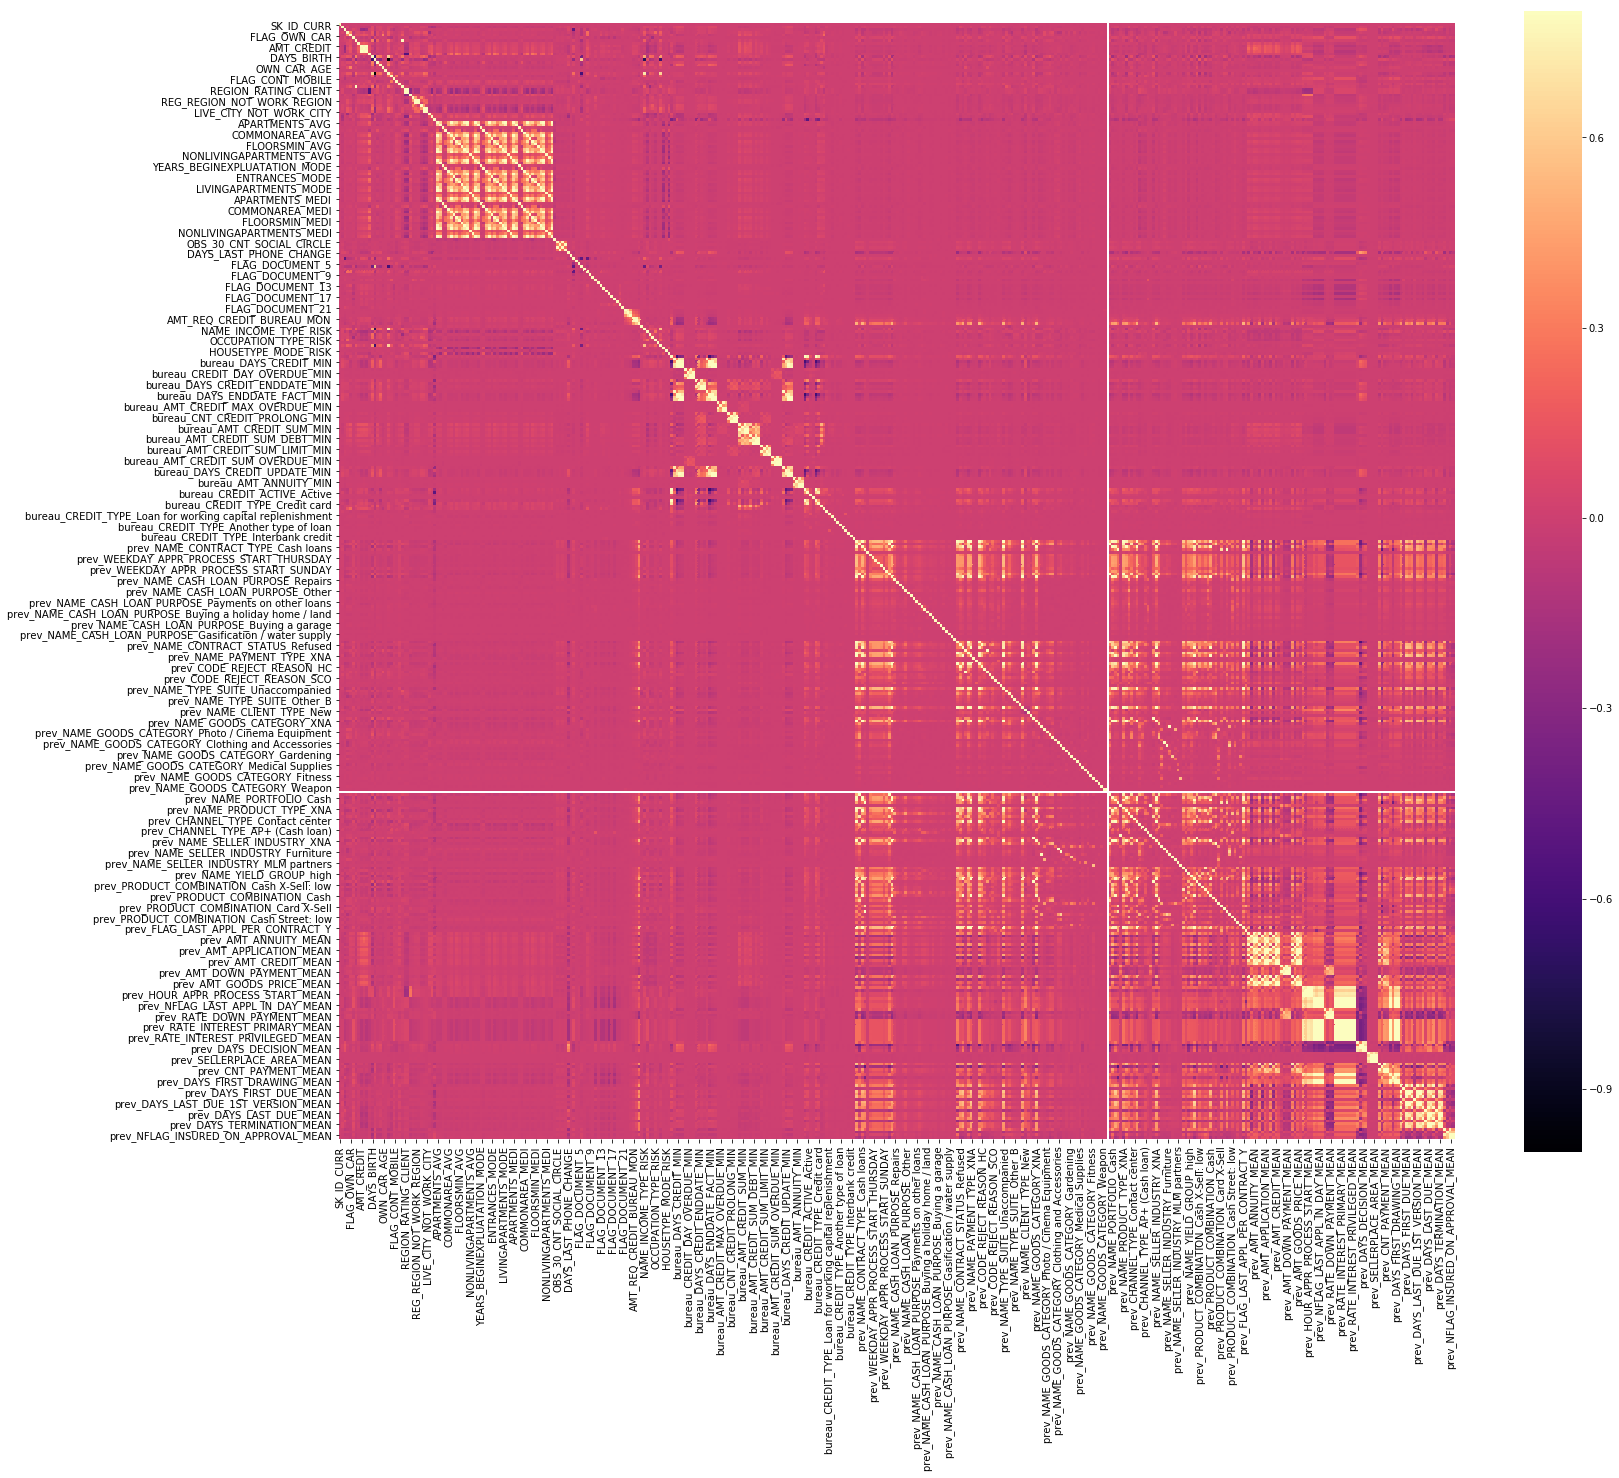

In [64]:
corr = data.corr()
plt.figure(figsize=(25, 21))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [65]:
data.shape

(307507, 410)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'TARGET']
y = data.loc[:, data.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

forest = RandomForestClassifier(n_estimators = 150, max_depth = 8)
forest.fit(X_train, y_train.values.ravel())
y_pred_proba = forest.predict_proba(X_test)

In [67]:
cnt_0 = 0
cnt_1 = 0

for elem in y_test['TARGET'].values:
    if elem == 0:
        cnt_0+=1
    else:
        cnt_1+=1
        
print(cnt_0, cnt_1)

y_predict = []

cnt_0 = 0
cnt_1 = 0

for elem in y_pred_proba:
    if elem[0] > 0.86: 
        cnt_0+=1
        y_predict.append(0)
    else: 
        cnt_1+=1
        y_predict.append(1)
        
print(cnt_0, cnt_1)
        
score = metrics.roc_auc_score(y_test['TARGET'].values, y_pred_proba[:, 1])
print(score)

84811 7442
85881 6372
0.7315434587054723


In [68]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

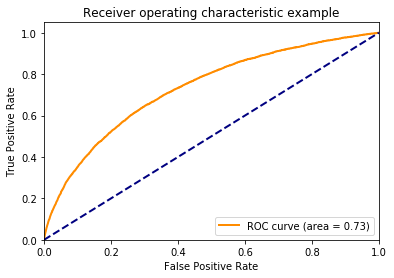

In [69]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. EXT_SOURCE_2 (0.113404)
2. EXT_SOURCE_3 (0.108776)
3. EXT_SOURCE_1 (0.036591)
4. bureau_DAYS_CREDIT_MED (0.023003)
5. DAYS_BIRTH (0.021295)
6. bureau_DAYS_CREDIT_MEAN (0.016788)
7. bureau_DAYS_CREDIT_UPDATE_MED (0.015523)
8. bureau_DAYS_CREDIT_UPDATE_MEAN (0.014164)
9. ORGANIZATION_TYPE_RISK (0.014098)
10. prev_DAYS_LAST_DUE_1ST_VERSION_MED (0.013633)
11. prev_DAYS_LAST_DUE_1ST_VERSION_MEAN (0.012637)
12. bureau_DAYS_ENDDATE_FACT_MED (0.012535)
13. prev_DAYS_LAST_DUE_MEAN (0.012356)
14. bureau_DAYS_CREDIT_MAX (0.011346)
15. prev_NAME_CONTRACT_STATUS_Refused (0.010599)
16. bureau_DAYS_CREDIT_ENDDATE_MED (0.010204)
17. bureau_DAYS_ENDDATE_FACT_MEAN (0.010119)
18. bureau_DAYS_CREDIT_ENDDATE_MEAN (0.009847)
19. NAME_EDUCATION_TYPE_RISK (0.009177)
20. bureau_DAYS_CREDIT_MIN (0.008582)
21. prev_DAYS_FIRST_DUE_MEAN (0.008459)
22. NAME_INCOME_TYPE_RISK (0.008393)
23. DAYS_LAST_PHONE_CHANGE (0.008145)
24. DAYS_EMPLOYED (0.007972)
25. bureau_CREDIT_ACTIVE_Active (0.007896)
26

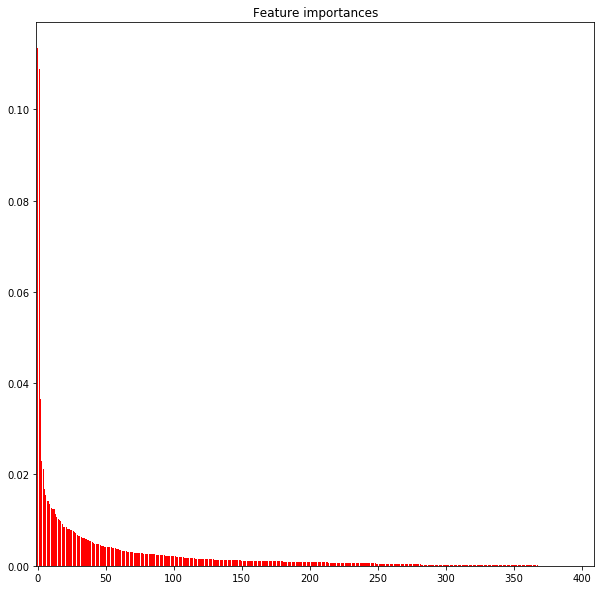

In [70]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")

plt.xlim([-1, X.shape[1]])
plt.show()

In [71]:
for f in range(X.shape[1]):
    if importances[indices[f]] < 0.001: 
        data.drop([X.columns[indices[f]]], 1, inplace=True)

data.shape

(307507, 175)